<a href="https://colab.research.google.com/github/NatashaGwena/WEEK-2-CORE-IP/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_09_Natasha_Gwena_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



#**1. Defining the question**




## a) Defining the Metric of Success

The measure of success of this analysis is if it is able to predict the individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda while at the same time provide insights into key demographic factors that might drive individuals’ financial outcomes

## b) Understanding the context
The ultimate aim of policies and strategies for financial inclusion is to increase access to formal financial
institutions and increase the uptake and usage of financial products and services (i.e. those provided by
regulated service providers)

## c) The experimental design taken

We shall be conducting Explorative Data Analysis, i.e Univariate and Bivariate to get the relationships and differences between different variables hence coming up with a prediction on individuals who are most likely to have or use a bank account

## d) Data Relevance

The data provided is for the year 2016 to 2018 for all the countries in our study, i.e(Kenya, Rwanda, Tanzania, and Uganda)
This enabled us come up with trends to depict which group of people are likely to have a bank account. 
The data contains important variables such as Gender, Education level, Age, Job type, etc. These are very useful in determining whether the different groups have access to a bank account or not.

#**2. Reading the data**

In [1]:
# Importing Libraries
# 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Loading the Financia lDataset data
# Define a function to load the dataset

def load(file):
  data = pd.read_csv(file)
  return data
df=load("http://bit.ly/FinancialDataset")
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
# Loading the Train.csv data
# Define a function to load the dataset

def load(file):
  data = pd.read_csv(file)
  return data
EA_data=load("/content/Train.csv")
EA_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


#**3. Checking the Data**

In [12]:
# Defining a function to return the shape, info,size and columns
#  of the dataframe


def info(data):
  s = data.shape 
  i = data.info 
  z = data.size
  c = data.columns
  return (s, i, z, c)


In [13]:
info(df)

((23524, 13),
 <bound method DataFrame.info of       country  year  ...              Level of Educuation                Type of Job
 0       Kenya  2018  ...              Secondary education              Self employed
 1       Kenya  2018  ...              No formal education       Government Dependent
 2       Kenya  2018  ...  Vocational/Specialised training              Self employed
 3       Kenya  2018  ...                Primary education  Formally employed Private
 4       Kenya  2018  ...                Primary education        Informally employed
 ...       ...   ...  ...                              ...                        ...
 23519  Uganda  2018  ...              No formal education               Other Income
 23520  Uganda  2018  ...              Secondary education               Other Income
 23521  Uganda  2018  ...                Primary education               Other Income
 23522  Uganda  2018  ...              Secondary education              Self employed
 23523  

In [5]:
info(EA_data)

((23524, 13),
 <bound method DataFrame.info of       country  year  ...                  education_level                   job_type
 0       Kenya  2018  ...              Secondary education              Self employed
 1       Kenya  2018  ...              No formal education       Government Dependent
 2       Kenya  2018  ...  Vocational/Specialised training              Self employed
 3       Kenya  2018  ...                Primary education  Formally employed Private
 4       Kenya  2018  ...                Primary education        Informally employed
 ...       ...   ...  ...                              ...                        ...
 23519  Uganda  2018  ...              No formal education               Other Income
 23520  Uganda  2018  ...              Secondary education               Other Income
 23521  Uganda  2018  ...                Primary education               Other Income
 23522  Uganda  2018  ...              Secondary education              Self employed
 23523  

In [6]:
# Checking for null values in our dataset
# Hence, the dataset has no Null values

EA_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [14]:
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [10]:
# Previewing the bottom of our dataset
# 

EA_data.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [9]:
# Checking whether each column has an appropriate datatype
#

EA_data.dtypes
des = EA_data.describe() 
 # Summary
des_num = EA_data.describe(include=[np.number]) 
# Include only numerical columns
des_obj = EA_data.describe(include=[np.object]) 
# Include only string columns
des_obj.transpose()

,count,unique,top,freq
country,23524,4,Rwanda,8735
uniqueid,23524,8735,uniqueid_397,4
bank_account,23524,2,No,20212
location_type,23524,2,Rural,14343
cellphone_access,23524,2,Yes,17454
gender_of_respondent,23524,2,Female,13877
relationship_with_head,23524,6,Head of Household,12831
marital_status,23524,5,Married/Living together,10749
education_level,23524,6,Primary education,12791
job_type,23524,10,Self employed,6437


In [15]:
# Checking whether each column has an appropriate datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [16]:

#Check for basic descriptive statistics for the numeric columns
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


#**4. External Data Source Validation**

#**5. Tidying the Dataset**

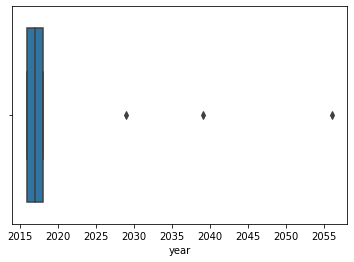

In [18]:
# Checking for Outliers

#For the year column
sns.boxplot(x=df['year'])
#Therefore the 3 points shown outside the boxplot are the outliers

In [19]:
#Remove the outliers in the year column
outliers = df[df['year'] > 2018].index
df.drop(outliers , inplace=True)
df.shape

(23521, 13)

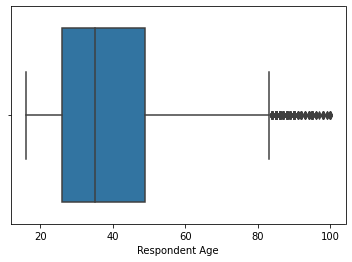

In [21]:
#Checking for outliers in the column age
sns.boxplot(x=df['Respondent Age'])
#From output, there are a number of outliers for ages between 80 to 100

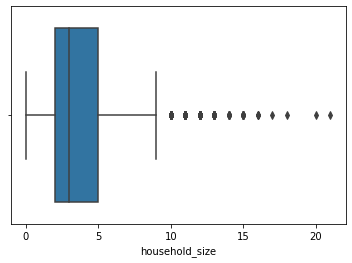

In [23]:

#Checking for outliers in the household size column
sns.boxplot(x=df['household_size'])
#From output, we can conclude that their are a few families with a household 
#size of between 10 and 21

In [24]:
# Checking for Anomalies
#
df['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

In [26]:
#Removing the outliers/anomalies using percentile
max_threshold = df['household_size'].quantile(0.95)
print(max_threshold)
df2 = df[df['household_size']<= max_threshold]
print(df2.shape)
print(df2.describe())
print(df2['household_size'].unique())

8.0
(22760, 13)
               year  household_size  Respondent Age
count  22760.000000    22760.000000    22735.000000
mean    2016.964938        3.475264       38.902661
std        0.842019        1.979997       16.563180
min     2016.000000        0.000000       16.000000
25%     2016.000000        2.000000       26.000000
50%     2017.000000        3.000000       35.000000
75%     2018.000000        5.000000       49.000000
max     2018.000000        8.000000      100.000000
[3. 5. 8. 7. 1. 6. 4. 2. 0.]


In [27]:
#Resetting indexes for new dataframe 
df2.reset_index().head()

,index,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [28]:
#Changing column names
df2.rename(columns={'Has a Bank account':'bank_acc',
                          'Type of Location':'residence', 'Respondent Age' : 'age', 'gender_of_respondent':'gender',
                          'Level of Educuation':'education', 'Type of Job': 'job'}, 
                 inplace=True)
df2.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['country', 'year', 'uniqueid', 'bank_acc', 'residence',
       'Cell Phone Access', 'household_size', 'age', 'gender',
       'The relathip with head', 'marital_status', 'education', 'job'],
      dtype='object')

In [29]:
#Dropping unnecessary columns
df2 = df2.drop(['uniqueid', 'Cell Phone Access', 'The relathip with head', 'marital_status'], axis = 1)
print(df2.columns)

Index(['country', 'year', 'bank_acc', 'residence', 'household_size', 'age',
       'gender', 'education', 'job'],
      dtype='object')


In [30]:
# Identifying the Missing Data
#
df2.isnull().sum()

country           14
year               0
bank_acc          36
residence         15
household_size     0
age               25
gender            29
education         28
job               29
dtype: int64

In [31]:
# Dealing with the Missing Data
#
#Removing all rows where having a bank account is null
df3 = df2[df2['bank_acc'].notna()] 
df3.shape
df3 = df3.reset_index(drop = True) 
#Drop all columns where value is NaN
df3 = df3[df3['gender'].notna()] 
print(df3.shape)
#data3.isnull().sum()
df_df = df3.dropna(axis=0, inplace=False)
df_df.isnull().sum()

(22695, 9)


country           0
year              0
bank_acc          0
residence         0
household_size    0
age               0
gender            0
education         0
job               0
dtype: int64

In [32]:
#Check for duplicates 
df_df = df_df.drop_duplicates(inplace=False)
df_df.shape

(14834, 9)

In [33]:
#Converting datatypes
#convert column year from int64 to datetime and residence to category
df_df['country'] = df_df['country'].astype('category')
df_df['bank_acc'] = df_df['bank_acc'].astype('category')
df_df['residence'] = df_df['residence'].astype('category')
df_df['gender'] = df_df['gender'].astype('category')
df_df['education'] = df_df['education'].astype('category')
df_df['year']= pd.to_datetime(df_df['year']) 
df_df['job'] = df_df['job'].astype('category')
df_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14834 entries, 0 to 22723
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country         14834 non-null  category      
 1   year            14834 non-null  datetime64[ns]
 2   bank_acc        14834 non-null  category      
 3   residence       14834 non-null  category      
 4   household_size  14834 non-null  float64       
 5   age             14834 non-null  float64       
 6   gender          14834 non-null  category      
 7   education       14834 non-null  category      
 8   job             14834 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(2)
memory usage: 551.7 KB


In [34]:
mean_householdsize = df_df['household_size'].mean()

df_df['household_size']=df_df.household_size.mask(df_df.household_size == 0,mean_householdsize)

#**6. Exploratory Data Analysis**

## a) Univariate Analysis

In [ ]:
# Ploting the univariate summaries and recording our observations
#

In [35]:
#Calculate measures of central tendency
df_df.mean()
print(df_df.mean())
df_df.mode()
print(df_df.mode())
df_df.median()
print(df_df.median())

household_size     3.616130
age               40.245652
dtype: float64
  country                          year  ...          education            job
0  Rwanda 1970-01-01 00:00:00.000002018  ...  Primary education  Self employed

[1 rows x 9 columns]
household_size     3.0
age               36.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  import sys


In [36]:
#Get min, max and range
#for age
min_age = df_df['age'].min()
print(min_age)
max_age = df_df['age'].max()
print(max_age)
range_age = max_age - min_age
print(range_age)
#For household size
min_size = df_df['household_size'].min()
print(min_size)
max_size = df_df['household_size'].max()
print(max_size)
range_size = max_size - min_size
print(range_size)

16.0
100.0
84.0
1.0
8.0
7.0


In [37]:
#Calculating measures of dispersion
st_dev = df_df.std()
print(st_dev)
skew = df_df.skew()
print(skew)
kurt = df_df.kurtosis()
print(kurt)

household_size     2.039625
age               17.443507
dtype: float64
household_size    0.444242
age               0.750009
dtype: float64
household_size   -0.833911
age              -0.159222
dtype: float64


In [38]:
#Calculate quantiles
quantile_age = df_df["age"].quantile([0.25,0.5,0.75])
print(quantile_age)
quantile_size = df_df["household_size"].quantile([0.25,0.5,0.75])
print(quantile_size)

0.25    26.0
0.50    36.0
0.75    52.0
Name: age, dtype: float64
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


In [39]:
# Univariate Summaries
#Frequency tables
df_df.country.value_counts()

Rwanda      5069
Kenya       4819
Tanzania    3375
Uganda      1571
Name: country, dtype: int64

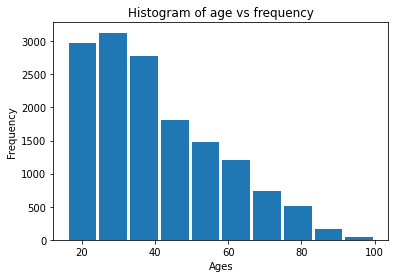

In [40]:
#Plotting a age histogram
age_points = df_df['age']

plt.hist(age_points, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histogram of age vs frequency')
plt.show()
#Most people in the dataset is between the ages of 25 and 30.

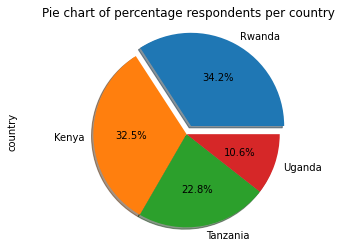

In [64]:
#pie chart for countries
df_df.country.value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 0, explode = (0.1, 0, 0, 0)   )
  
plt.axis('equal')
plt.title('Pie chart of percentage respondents per country')
plt.show()
#We can conclude that Rwanda has the highest number of respondents in this study
#at 34.2% and Uganda the lowest at 10.6%

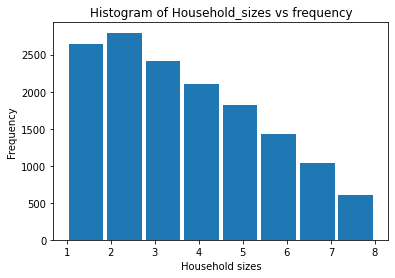

In [41]:
#Plotting a age histogram
size_points = df_df['household_size']

plt.hist(size_points, bins=8, histtype='bar', rwidth=0.9)
plt.xlabel('Household sizes')
plt.ylabel('Frequency')
plt.title('Histogram of Household_sizes vs frequency')
plt.show()
#Most people in the dataset have a household size of between 2 to 3

## b) Bivariate Analysis

In [ ]:
# Ploting the bivariate summaries and recording our observations
#

In [43]:
#Numeric-Numeric Variables
#Checking for numeric variables in our data
#isolating numerical datatypes
numerical = df_df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

household_size    float64
age               float64
dtype: object

In [44]:
#Calculating correlation
correlation = numerical.dropna().corr()
correlation

,household_size,age
household_size,1.000000,-0.127624
age,-0.127624,1.000000


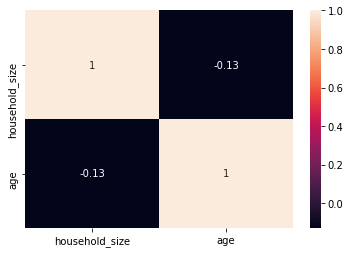

In [45]:
# Correlation heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
#There is no correlation between household size and age of respondents

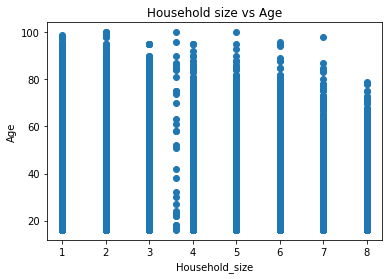

In [47]:
#Plotting scatter plots
plt.scatter(numerical["household_size"] , df_df["age"])
plt.title('Household size vs Age')
plt.xlabel('Household_size')
plt.ylabel('Age')
plt.show()

In [48]:
#Categorical-categorical
df_df.dtypes

country                 category
year              datetime64[ns]
bank_acc                category
residence               category
household_size           float64
age                      float64
gender                  category
education               category
job                     category
dtype: object

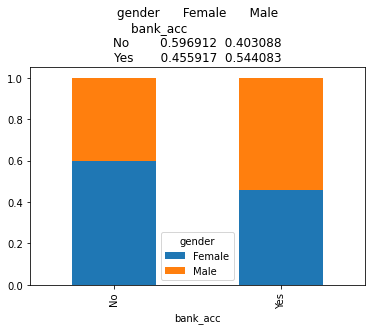

In [49]:
#Which gender is most likely to own a bank account
ax1 = df_df.groupby('bank_acc')['gender'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True',title=str(ax1))
int_level = df_df['bank_acc'].value_counts()
#From output, we can conclude 
#the difference between the males and females who own a bank account is 
#significant. The number of Males who own a bank account is significantly more 
#than females.

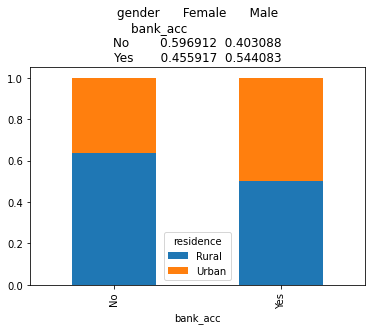

In [51]:
#People from which kind of residence are most likely to own a bank account
ax2 = df_df.groupby('bank_acc')['residence'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',title=str(ax1))
int_level = df_df['bank_acc'].value_counts()
#From output, we can conclude 
#Individuals from urban setup are most likely to have a bank account and
# those from rural areas are less likely to have a bank account

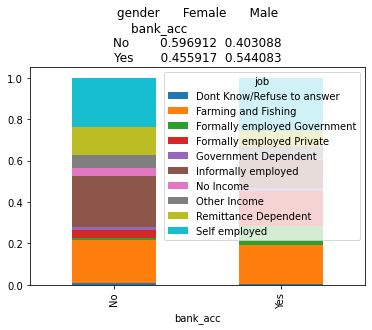

In [52]:
#People from which kind of jobs are most likely to own a bank account
ax3 = df_df.groupby('bank_acc')['job'].value_counts(normalize=True).unstack()
ax3.plot(kind='bar', stacked='True',title=str(ax1))
int_level = df_df['bank_acc'].value_counts()
#From output, we can conclude 
#Individuals who are self employed are most likely to have a bank account and
# those who are informally employed are less likely to have a bank account

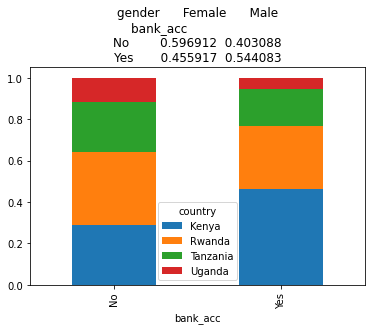

In [53]:
#People from which country are most likely to own a bank account
ax4 = df_df.groupby('bank_acc')['country'].value_counts(normalize=True).unstack()
ax4.plot(kind='bar', stacked='True',title=str(ax1))
int_level = df_df['bank_acc'].value_counts()
#From output, we can conclude 
#Individuals from Kenya are most likely to have a bank account and
# those Uganda are less likely to have a bank account

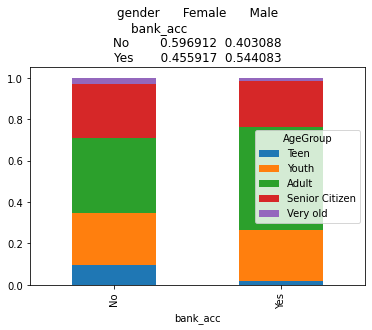

In [54]:
#Numerical-Categorical Variables
#create Age groups

bins= [10,20,30,50,80,100]
labels = ['Teen','Youth','Adult','Senior Citizen','Very old']
df_df['AgeGroup'] = pd.cut(df_df['age'], bins=bins, labels=labels, right=False)
df_df
#People from which AgeGroup are most likely to own a bank account
ax5 = df_df.groupby('bank_acc')['AgeGroup'].value_counts(normalize=True).unstack()
ax5.plot(kind='bar', stacked='True',title=str(ax1))
int_level = df_df['bank_acc'].value_counts()
#From output, we can conclude  that
#Individuals between the ages of 30_50, adults are most likely to have a bank 
# account and those above 80years are less likely to have a bank account

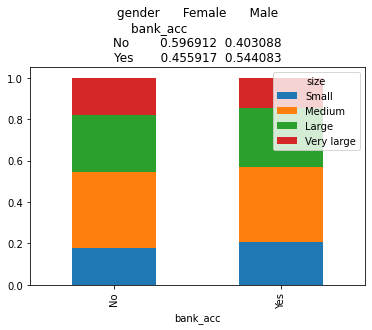

In [56]:
#create Household size groups

bins= [1,2,4,6,8]
labels = ['Small','Medium','Large','Very large']
df_df['size'] = pd.cut(df_df['household_size'], bins=bins, labels=labels, right=False)
df_df
#People from which AgeGroup are most likely to own a bank account
ax6 = df_df.groupby('bank_acc')['size'].value_counts(normalize=True).unstack()
ax6.plot(kind='bar', stacked='True',title=str(ax1))
int_level = df_df['bank_acc'].value_counts()
#From output, we can conclude  that
#Individuals from medium sized homes are most likely to have a bank 
# account and those from very large families are less likely to have a bank account

## c) Multivariate Analysis

In [ ]:
# Numerical data is absent to create a multivariate analysis

#**7. Implementing the Solution**

## Discriminant analysis

In [57]:
#Discriminant analysis using the dataset df_df dividing data into labels and feature set

x = df_df.iloc[:, 4:6].values
y = df_df.iloc[:, 2].values
x
y

['Yes', 'No', 'Yes', 'No', 'No', ..., 'No', 'No', 'No', 'No', 'No']
Length: 14834
Categories (2, object): ['No', 'Yes']

In [58]:
#Divide data into training and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [59]:
#Feature scaling
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [60]:
# Discriminant analysis with Scikit-Learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)
print(x_test)
print(x_train)

[[ 0.45081481]
 [-1.74830906]
 [-0.63773291]
 ...
 [-2.01265019]
 [ 1.00152549]
 [-0.02522816]]
[[-0.76206402]
 [-1.13580431]
 [-1.35608858]
 ...
 [-1.57208164]
 [ 1.06761078]
 [-0.74358383]]


In [61]:
#Training and Making Predictions using the random forest classifier to evaluate the performance of a LDA-reduced algorithms
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [62]:
# Evaluating the Performance with the help of a confusion matrix and find the accuracy of the prediction.


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# The algorithm achieved an accuracy of 80%

[[2356    0]
 [ 611    0]]
Accuracy0.7940680822379508


#**8. Follow up questions**

**a). Did we have the right data?**

Yes, because the data had al the relevant fields.

**b). Do we need other data to answer our question**

No, but it would have been better to have more numerical values in the data.

**c). Did we have the right question?**

Yes. It was relevant to the current state of the world since many more people are signing up for bank accounts, so its good to analyse such data.